In [64]:
import pyart
from matplotlib import pyplot as plt
import numpy as np
import cartopy
import cartopy.feature as cfeature
import boto3

#botocore contains core configuration utilities for boto2 and boto3
from botocore.handlers import disable_signing

#Tempory files in Python.. A very useful module
import tempfile

#datetime modules.. very handy!
from datetime import datetime

#timezone info
import pytz
%matplotlib inline 

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/botocore/vendored/requests/packages/urllib3/_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/botocore/vendored/requests/packages/urllib3/_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3

In [58]:
filename = '/Users/scollis/data/xsapr-sampl/XSW180525100006.RAW00X9'
radar = pyart.io.read(filename)

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


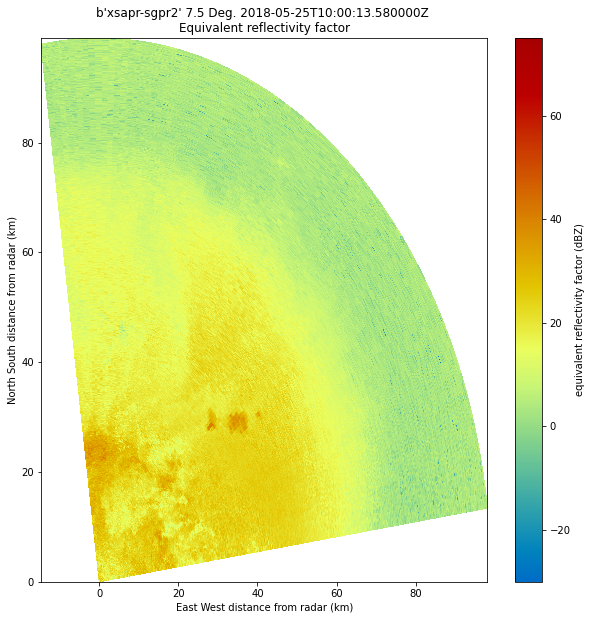

In [59]:
myf = plt.figure(figsize=[10,10])
myd = pyart.graph.RadarDisplay(radar)
myd.plot_ppi('reflectivity')


In [60]:
#41.3842° N, 82.5121° W
radar.longitude['data'] = np.array([-82.5121])
radar.latitude['data'] = np.array([41.3842])

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:258: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  + "axes.", UserWarning)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/graph/radarmap

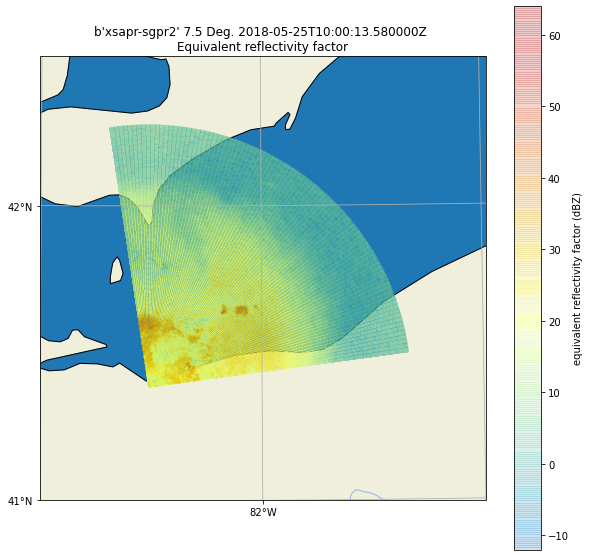

In [61]:
myf = plt.figure(figsize=[10,10])
projection = cartopy.crs.Mercator(
                central_longitude=82,
                min_latitude=30, max_latitude=50)

myd = pyart.graph.RadarMapDisplay(radar)
myd.plot_ppi_map('reflectivity', sweep=0 ,
    vmin=-12, vmax=64, resolution='50m', min_lat=41, max_lat=42.5, min_lon=-83, max_lon=-81,
                alpha=0.2)

#gl = myd.ax.gridlines(draw_labels=True,
#                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

lakes_50mL = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='black',
                                        facecolor=None)


g2 = myd.ax.add_feature(cfeature.COASTLINE)
g2 = myd.ax.add_feature(cfeature.LAND)
#g2 = myd.ax.add_feature(cfeature.BORDERS)
g2 = myd.ax.add_feature(cfeature.RIVERS)

#g3 = myd.ax.add_feature(cartopy.feature.LAKES, zorder=0)
g4 = myd.ax.add_feature(lakes_50m, zorder=0)
g4 = myd.ax.add_feature(lakes_50mL, zorder=0)


In [62]:
myd.plot_ppi_map?

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
radar.longitude

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-82.5121])}

In [65]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))
def find_my_key(radar_name, desired_datetime):
    """
    Find the key in Amazon s3 corresponding to a particular radar site and 
    datetime
    
    Parameters
    ----------
    radar_name : str
        Four letter radar name
    desired_datetime : datetime
        The date time desired
    Returns
    -------
    my_key : string
        string matching the key for the radar file on AWS s3
    """
    
    bucket = "noaa-nexrad-level2"
    # Create a s3 "client"
    s3 = boto3.resource('s3')
    # Set it to unsigned 
    s3.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
    aws_radar = s3.Bucket(bucket)
    target_string = datetime.strftime(desired_datetime, '%Y/%m/%d/'+radar_name)
    my_list_of_keys = [this_object.key for this_object in aws_radar.objects.filter(Prefix=target_string)]
    my_list_of_datetimes = []
    for obj in aws_radar.objects.filter(Prefix=target_string):
        try:
            my_list_of_datetimes.append(datetime.strptime(obj.key[20:35], '%Y%m%d_%H%M%S'))
        except ValueError:
            pass #usually a tar file left in the bucket
    my_nearest = nearest(my_list_of_datetimes, desired_datetime)
    my_key = my_list_of_keys[my_list_of_datetimes.index(my_nearest)]
    return my_key, aws_radar

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
print(find_my_key('KVNX', datetime(2018,5,25,10)))

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('2018/05/25/KVNX/KVNX20180525_100147_V06', s3.Bucket(name='noaa-nexrad-level2'))


In [75]:
my_key, aws_radar = find_my_key('KVNX', datetime(2018,5,25,10))
print(my_key)

#create a temporary named file
localfile = tempfile.NamedTemporaryFile()

#fetch the data from AWS S3
aws_radar.download_file(my_key, localfile.name)

#read that file into Py-ART!
nexradar = pyart.io.read(localfile.name)

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2018/05/25/KVNX/KVNX20180525_100147_V06


In [76]:
nexradar.longitude['data'] = np.array([-82.5121])
nexradar.latitude['data'] = np.array([41.3842])

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


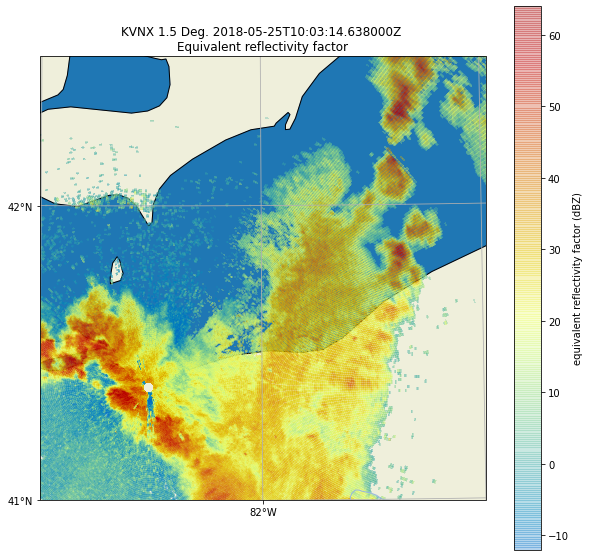

In [78]:
myf = plt.figure(figsize=[10,10])
projection = cartopy.crs.Mercator(
                central_longitude=82,
                min_latitude=30, max_latitude=50)

myd = pyart.graph.RadarMapDisplay(nexradar)
myd.plot_ppi_map('reflectivity', sweep=3 ,
    vmin=-12, vmax=64, resolution='50m', min_lat=41, max_lat=42.5, min_lon=-83, max_lon=-81,
                alpha=0.3)

#gl = myd.ax.gridlines(draw_labels=True,
#                          linewidth=2, color='gray', alpha=0.5, linestyle='--')

lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

lakes_50mL = cfeature.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='black',
                                        facecolor=None)


g2 = myd.ax.add_feature(cfeature.COASTLINE)
g2 = myd.ax.add_feature(cfeature.LAND)
#g2 = myd.ax.add_feature(cfeature.BORDERS)
g2 = myd.ax.add_feature(cfeature.RIVERS)

#g3 = myd.ax.add_feature(cartopy.feature.LAKES, zorder=0)
g4 = myd.ax.add_feature(lakes_50m, zorder=0)
g4 = myd.ax.add_feature(lakes_50mL, zorder=0)


In [86]:
sacrradar = pyart.io.read('/Users/scollis/data/sacr-samples/sgpkasacrhsrhiC1.a1.20110609.160202.nc')

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  metadata = dict([(k, getattr(ncobj, k)) for k in ncobj.ncattrs()])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:112: DeprecationWarning: tostring() is deprecate

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use 

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if k not in ['scale_factor', 'add_offset'])
/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/pyart/io/cfradial.py:338: DeprecationWarning: tostring() is deprecated. Use 

/Users/scollis/miniconda3/envs/pyart-simple/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.0, 10.0)

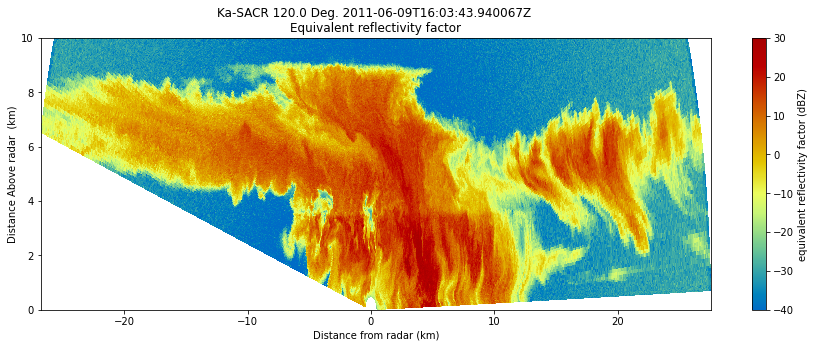

In [108]:
myf = plt.figure(figsize=[15,5])
myd = pyart.graph.RadarDisplay(sacrradar)
myd.plot_rhi('reflectivity', vmin=-40, vmax=30, sweep=4)
plt.ylim([0,10])